In [1]:
import pandas as pd
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Load the dataset into a DataFrame
data = pd.read_csv("/Users/cibisribalaji/Downloads/new/ad.csv")

# Data preprocessing and feature extraction
# For this analysis, we will focus only on the 'Ad Topic Line' and 'Clicked on Ad' columns
ad_topic_lines = data['Ad Topic Line']
clicked_on_ads = data['Clicked on Ad']

# Data preprocessing steps
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove symbols and punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmed_tokens = [porter.stem(word) for word in filtered_tokens]
    # Join tokens back into text
    preprocessed_text = ' '.join(stemmed_tokens)
    return preprocessed_text

# Apply data preprocessing to each ad topic line
preprocessed_ad_topic_lines = ad_topic_lines.apply(preprocess_text)

# Perform sentiment analysis using TextBlob
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to each preprocessed ad topic line
data['Sentiment'] = preprocessed_ad_topic_lines.apply(get_sentiment)

# Count the number of positive, negative, and neutral ads
sentiment_counts = data['Sentiment'].value_counts()

# Provide insights on clicked on ads
positive_clicked_on = data[(data['Sentiment'] == 'Positive') & (data['Clicked on Ad'] == 1)].shape[0]
negative_clicked_on = data[(data['Sentiment'] == 'Negative') & (data['Clicked on Ad'] == 1)].shape[0]
neutral_clicked_on = data[(data['Sentiment'] == 'Neutral') & (data['Clicked on Ad'] == 1)].shape[0]

# Provide overall insights
print("\nAnalysis on Clicked Ads:")
total_positive_ads = sentiment_counts['Positive']
total_negative_ads = sentiment_counts['Negative']
total_neutral_ads = sentiment_counts['Neutral']

print("Number of Positive Ads Clicked On:", f"{positive_clicked_on}/{total_positive_ads} ({positive_clicked_on/total_positive_ads:.2%})")
print("Number of Negative Ads Clicked On:", f"{negative_clicked_on}/{total_negative_ads} ({negative_clicked_on/total_negative_ads:.2%})")
print("Number of Neutral Ads Clicked On:", f"{neutral_clicked_on}/{total_neutral_ads} ({neutral_clicked_on/total_neutral_ads:.2%})")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cibisribalaji/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/cibisribalaji/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Analysis on Clicked Ads:
Number of Positive Ads Clicked On: 2009/2534 (79.28%)
Number of Negative Ads Clicked On: 715/2374 (30.12%)
Number of Neutral Ads Clicked On: 22158/45092 (49.14%)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(preprocessed_ad_topic_lines, clicked_on_ads, test_size=0.2, random_state=42)

# Vectorize the text using bag-of-words
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [3]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_vectorized, y_train)
svm_predictions = svm_classifier.predict(X_test_vectorized)

# Evaluate SVM classifier
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)

print("\nSVM Classifier:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)


SVM Classifier:
Accuracy: 0.8001
Precision: 0.7997967479674797
Recall: 0.7951101232572236
F1 Score: 0.7974465498024116


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(preprocessed_ad_topic_lines, clicked_on_ads, test_size=0.2, random_state=42)

# Vectorize the text using bag-of-words
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train Naïve Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)
nb_predictions = nb_classifier.predict(X_test_vectorized)

# Evaluate Naïve Bayes classifier
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_precision = precision_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions)

print("Naïve Bayes Classifier:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1)


Naïve Bayes Classifier:
Accuracy: 0.7532
Precision: 0.7595731324544884
Recall: 0.7334815114164478
F1 Score: 0.7462993421052632


In [5]:
# Import logistic regression module from scikit-learn
from sklearn.linear_model import LogisticRegression

# Train logistic regression classifier
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train_vectorized, y_train)
logistic_regression_predictions = logistic_regression.predict(X_test_vectorized)

# Evaluate logistic regression classifier
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)
logistic_regression_precision = precision_score(y_test, logistic_regression_predictions)
logistic_regression_recall = recall_score(y_test, logistic_regression_predictions)
logistic_regression_f1 = f1_score(y_test, logistic_regression_predictions)

print("\nLogistic Regression Classifier:")
print("Accuracy:", logistic_regression_accuracy)
print("Precision:", logistic_regression_precision)
print("Recall:", logistic_regression_recall)
print("F1 Score:", logistic_regression_f1)


Logistic Regression Classifier:
Accuracy: 0.8038
Precision: 0.809790499896287
Recall: 0.7888462315619317
F1 Score: 0.7991811668372569


In [6]:
# Import XGBoost
from xgboost import XGBClassifier

# Train XGBoost classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train_vectorized, y_train)
xgb_predictions = xgb_classifier.predict(X_test_vectorized)

# Evaluate XGBoost classifier
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_precision = precision_score(y_test, xgb_predictions)
xgb_recall = recall_score(y_test, xgb_predictions)
xgb_f1 = f1_score(y_test, xgb_predictions)

print("\nXGBoost Classifier:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)



XGBoost Classifier:
Accuracy: 0.8106
Precision: 0.8133333333333334
Recall: 0.8011719539300869
F1 Score: 0.8072068403908795


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier

# Define pipeline including feature extraction and XGBoost classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Use TF-IDF for feature extraction
    ('xgb', XGBClassifier())       # XGBoost classifier
])

# Define hyperparameters to tune
param_grid = {
    'tfidf__max_df': (0.5, 0.75, 1.0),
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],  # Include trigrams as well
    'xgb__n_estimators': [300, 400, 500],           # Extend the range of n_estimators
    'xgb__learning_rate': [0.01, 0.05, 0.1],        # Include a lower learning rate
    'xgb__max_depth': [8, 9, 10]                     # Extend the range of max_depth
}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
best_predictions = best_model.predict(X_test)

# Calculate evaluation metrics
opt_xgb_accuracy = accuracy_score(y_test, best_predictions)
opt_xgb_precision = precision_score(y_test, best_predictions)
opt_xgb_recall = recall_score(y_test, best_predictions)
opt_xgb_f1 = f1_score(y_test, best_predictions)

print("\nOptimized XGBoost Classifier:")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", opt_xgb_accuracy)
print("Precision:", opt_xgb_precision)
print("Recall:", opt_xgb_recall)
print("F1 Score:", opt_xgb_f1)


Optimized XGBoost Classifier:
Best Parameters: {'tfidf__max_df': 0.5, 'tfidf__ngram_range': (1, 2), 'xgb__learning_rate': 0.1, 'xgb__max_depth': 10, 'xgb__n_estimators': 500}
Accuracy: 0.8165
Precision: 0.8250521920668058
Recall: 0.7985451606385129
F1 Score: 0.811582297977205


In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Tokenize the text
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Create the training sequences
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=30, padding='post', truncating='post')

# Create the testing sequences
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=30, padding='post', truncating='post')

# Create the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 64, input_length=30),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(training_padded, y_train, epochs=10, validation_data=(testing_padded, y_test))

# Predict on test data
y_pred = (model.predict(testing_padded) > 0.5).astype("int32")
cnn_accuracy = accuracy_score(y_test, y_pred)
cnn_precision = precision_score(y_test, y_pred)
cnn_recall = recall_score(y_test, y_pred)
cnn_f1 = f1_score(y_test, y_pred)

print("\nCNN Classifier:")
print("Accuracy:", cnn_accuracy)
print("Precision:", cnn_precision)
print("Recall:", cnn_recall)
print("F1 Score:", cnn_f1)

Epoch 1/10
1250/1250 [==============================] - 22s 17ms/step - loss: 0.4495 - accuracy: 0.7887 - val_loss: 0.4151 - val_accuracy: 0.8079
Epoch 2/10
1250/1250 [==============================] - 20s 16ms/step - loss: 0.4139 - accuracy: 0.8092 - val_loss: 0.4105 - val_accuracy: 0.8063
Epoch 3/10
1250/1250 [==============================] - 20s 16ms/step - loss: 0.4065 - accuracy: 0.8120 - val_loss: 0.4083 - val_accuracy: 0.8142
Epoch 4/10
1250/1250 [==============================] - 21s 17ms/step - loss: 0.4041 - accuracy: 0.8130 - val_loss: 0.4031 - val_accuracy: 0.8125
Epoch 5/10
1250/1250 [==============================] - 20s 16ms/step - loss: 0.4020 - accuracy: 0.8139 - val_loss: 0.4083 - val_accuracy: 0.8099
Epoch 6/10
1250/1250 [==============================] - 20s 16ms/step - loss: 0.4010 - accuracy: 0.8154 - val_loss: 0.4055 - val_accuracy: 0.8108
Epoch 7/10
1250/1250 [==============================] - 20s 16ms/step - loss: 0.4001 - accuracy: 0.8135 - val_loss: 0.4022 -

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Tokenize the text
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Create the training sequences
training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=30, padding='post', truncating='post')

# Create the testing sequences
testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=30, padding='post', truncating='post')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=2, min_lr=0.00001, verbose=1)

# Create the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 64, input_length=30),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    training_padded, y_train,
    epochs=10,
    validation_data=(testing_padded, y_test),
    callbacks=[early_stopping, reduce_lr]
)

# Predict on test data
y_pred = (model.predict(testing_padded) > 0.5).astype("int32")
opt_cnn_accuracy = accuracy_score(y_test, y_pred)
opt_cnn_precision = precision_score(y_test, y_pred)
opt_cnn_recall = recall_score(y_test, y_pred)
opt_cnn_f1 = f1_score(y_test, y_pred)

print("\nOptimized CNN Classifier:")
print("Accuracy:", opt_cnn_accuracy)
print("Precision:", opt_cnn_precision)
print("Recall:", opt_cnn_recall)
print("F1 Score:", opt_cnn_f1)

Epoch 1/10
1250/1250 [==============================] - 22s 17ms/step - loss: 0.4505 - accuracy: 0.7883 - val_loss: 0.4160 - val_accuracy: 0.8053 - lr: 0.0010
Epoch 2/10
1250/1250 [==============================] - 20s 16ms/step - loss: 0.4121 - accuracy: 0.8101 - val_loss: 0.4072 - val_accuracy: 0.8140 - lr: 0.0010
Epoch 3/10
1250/1250 [==============================] - 19s 16ms/step - loss: 0.4064 - accuracy: 0.8114 - val_loss: 0.4056 - val_accuracy: 0.8137 - lr: 0.0010
Epoch 4/10
1250/1250 [==============================] - 20s 16ms/step - loss: 0.4029 - accuracy: 0.8127 - val_loss: 0.4054 - val_accuracy: 0.8124 - lr: 0.0010
Epoch 5/10
1250/1250 [==============================] - 20s 16ms/step - loss: 0.4016 - accuracy: 0.8127 - val_loss: 0.4059 - val_accuracy: 0.8149 - lr: 0.0010
Epoch 6/10
1250/1250 [==============================] - ETA: 0s - loss: 0.4055 - accuracy: 0.8108
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
1250/1250 [====================

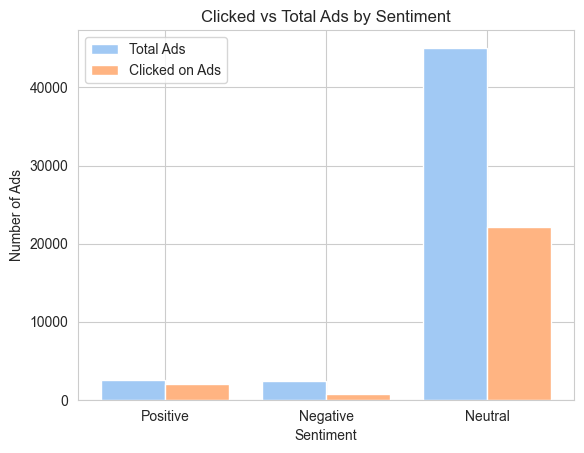

In [9]:
import matplotlib.pyplot as plt

# Visualizing the data
labels = ['Positive', 'Negative', 'Neutral']
clicked_on_counts = [positive_clicked_on, negative_clicked_on, neutral_clicked_on]
total_counts = [total_positive_ads, total_negative_ads, total_neutral_ads]

x = range(len(labels))

plt.bar(x, total_counts, width=0.4, label='Total Ads')
plt.bar([i + 0.4 for i in x], clicked_on_counts, width=0.4, label='Clicked on Ads')

plt.xlabel('Sentiment')
plt.ylabel('Number of Ads')
plt.title('Clicked vs Total Ads by Sentiment')
plt.xticks([i + 0.2 for i in x], labels)
plt.legend()
plt.show()


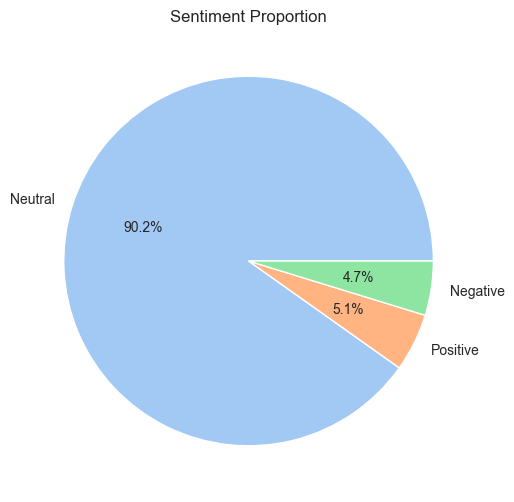

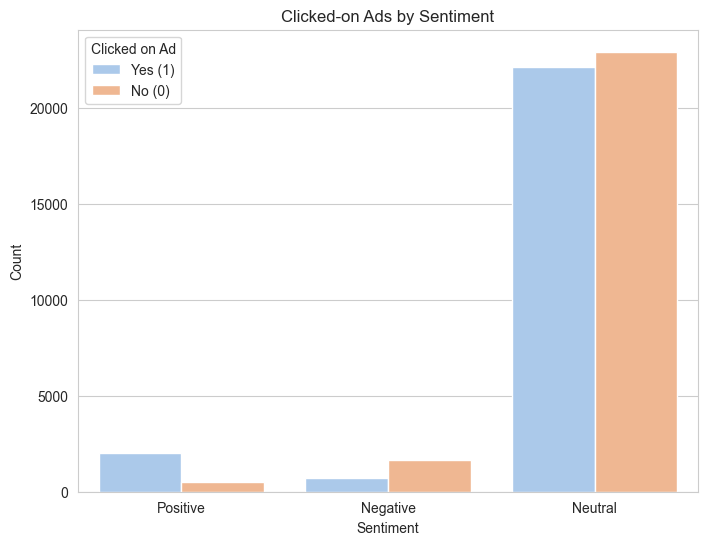

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reorder the categories and change the hue order
sns.set_palette("pastel")  # Set color palette
sns.set_style("whitegrid")  # Set style

# Define the order of the categories
order = ['Positive', 'Negative', 'Neutral']


# Pie Chart for Sentiment Proportion
plt.figure(figsize=(8, 6))
data['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sentiment Proportion')
plt.ylabel('')
plt.show()

# Bar Chart for Clicked-on Ads by Sentiment
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', hue='Clicked on Ad', data=data, order=order, hue_order=[1, 0])
plt.title('Clicked-on Ads by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Clicked on Ad', labels=['Yes (1)', 'No (0)']) 
plt.show()



